In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger

plt.rcParams['figure.figsize'] = (35, 15)

Let's continue to explore our NYC 311 service requests example. Load the dataframe as previously

In [4]:
request = pd.read_csv('../data/311-service-requests.csv', encoding='latin1')
request.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


# 3.1 Selecting only noise complaints

In this section we are going to select only noise Complaints. To do that we are going to select only a few rows using the .loc attribute withs masks (or filters). The idea is to build a mask with a condition

For instance the mask `mask = df['column_name'] == 'something'` will return a column of boolean telling if the row has the value 'something'

Then we can select the corresponding lines in the dataset using 

`df[mask]`

Select rows corresponding the `'Complaint Type'` being `'Noise - Street/Sidewalk'`. Print the mask to check that it contains bolean values

Of course we can get more complexe masks. For instance we can use the and operator : & and the or operator |. Beware not using `and` and `or` as it does not work in pandas. Build a mask selecting all kind of noise complaints. You can use the `.unique()` methods or `.value_counts()` to see all noise complaint types

In [17]:
masktou = request['Complaint Type'].str.contains('Noise')
# type(masktou)
masktou
#askcom = request['Complaint Type'] == 'Noise - Commercial'
#maskveh = request['Complaint Type'] == 'Noise - Vehicule'
# maskst = request['Complaint Type'] == 'Noise - Street/Sidewalk'
# maskst

0          True
1         False
2          True
3          True
4         False
5          True
6         False
7          True
8          True
9          True
10         True
11         True
12        False
13         True
14        False
15         True
16         True
17        False
18        False
19         True
20         True
21         True
22         True
23         True
24        False
25         True
26        False
27        False
28         True
29        False
          ...  
111039     True
111040     True
111041     True
111042     True
111043     True
111044     True
111045    False
111046     True
111047    False
111048     True
111049     True
111050     True
111051     True
111052    False
111053    False
111054     True
111055     True
111056    False
111057     True
111058     True
111059     True
111060     True
111061     True
111062    False
111063    False
111064    False
111065    False
111066     True
111067     True
111068    False
Name: Complaint Type, Le

In [20]:
don = request[masktou]
don[['Agency', 'Unique Key']].head()

# donb=don['Complaint Type'][0:10]
# donb

,Agency,Unique Key
0,NYPD,26589651
2,NYPD,26594139
3,NYPD,26595721
5,NYPD,26592370
7,NYPD,26595195


So now you the .loc returned all columns. You can also specify a few exemples by using `df[mask, list_column_name]`. If you want to select columns by index use .iloc instead

# 3.2 Which borough has the most noise complaints?

By using the previous mask for noise complaints, get the number of complaints for each Borough

In [22]:
pville = request[masktou]['Borough']
pville

0                QUEENS
2             MANHATTAN
3             MANHATTAN
5                QUEENS
7                QUEENS
8             MANHATTAN
9              BROOKLYN
10             BROOKLYN
11            MANHATTAN
13                BRONX
15            MANHATTAN
16        STATEN ISLAND
19            MANHATTAN
20             BROOKLYN
21            MANHATTAN
22               QUEENS
23             BROOKLYN
25        STATEN ISLAND
28            MANHATTAN
31             BROOKLYN
33            MANHATTAN
37             BROOKLYN
40               QUEENS
42             BROOKLYN
43             BROOKLYN
44                BRONX
45                BRONX
46                BRONX
48            MANHATTAN
49             BROOKLYN
              ...      
111018           QUEENS
111021         BROOKLYN
111027         BROOKLYN
111028    STATEN ISLAND
111029        MANHATTAN
111031        MANHATTAN
111033        MANHATTAN
111034        MANHATTAN
111035         BROOKLYN
111037        MANHATTAN
111039        MA

Convert this number into percentage

In [23]:
freq = pville.value_counts(normalize = True)
freq

MANHATTAN        0.485015
BROOKLYN         0.262134
QUEENS           0.142809
BRONX            0.080407
STATEN ISLAND    0.028853
Unspecified      0.000783
Name: Borough, dtype: float64

In [57]:
somme = sum(freq)
somme

3321

In [71]:
l = []
for i in range(len(freq)):
    l.append(round((freq[i]/somme)*100,2))

l

[55.65, 23.1, 12.59, 5.06, 3.46, 0.15]

In [25]:
percent = round(freq/freq.sum(),7)
percent

MANHATTAN        0.485015
BROOKLYN         0.262134
QUEENS           0.142809
BRONX            0.080407
STATEN ISLAND    0.028853
Unspecified      0.000783
Name: Borough, dtype: float64

Plot it

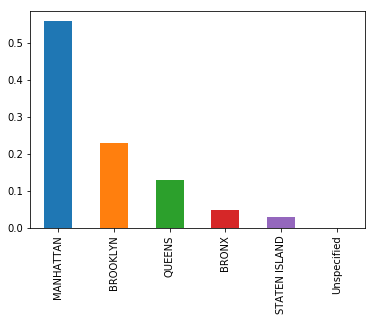

In [75]:
percent.plot.bar()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  